# Colorear Rellenos En Gráficas

Se pueden colorear los espacios entre plots, usar condiciones para colorear y rellenar ciertas areas encima o debajo de la gráfica, entre muchas otras opciones que ofrece Matplotlib para personalizar las gráficas.
> El siguiente ejemplo muestra los datos de un CSV file el cual contiene el salario medio de todos los desarrolladores de software, programadores que usan Python y programadores que usan JavaScript de acuerdo con la edad. Se procede a graficar eos `plots`

In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('salaries.csv')
dataframe

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704
5,23,30252,37732,29000
6,24,34368,41247,34372
7,25,38496,45372,37810
8,26,42000,48876,43515
9,27,46752,53850,46823


In [3]:
ages = dataframe['Age']
all_salaries = dataframe['All_Devs']
python_salaries = dataframe['Python']
js_salaries = dataframe['JavaScript']

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

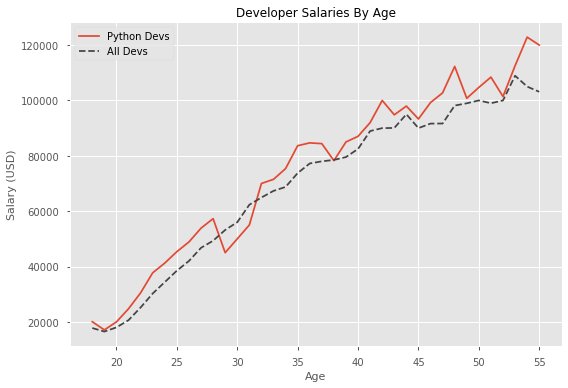

In [9]:
plt.style.use('seaborn-notebook')

plt.plot(ages, python_salaries, label='Python Devs')
plt.plot(ages, all_salaries, color='#444444', linestyle='--', label='All Devs')

plt.legend()
plt.title('Developer Salaries By Age')
plt.xlabel('Age')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show

## ¿Cómo relleno de color el área debajo del plot de Python?

Se debe crear un gráfico de relleno usando `plt.fill_between`:
- Se pasa como primer argumento los datos del `eje x`
- Como segundo argumento se pasan los datos de `python_salaries`, es decir, la línea hasta la que quiero rellenar.
- Para ver mejor los colores, uso un `alpha=0.25` para hacer el relleno más claro
> Esto solo va a rellenar desde el plot hasta el `eje y` en cero, dado que es el default de relleno que trae Matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

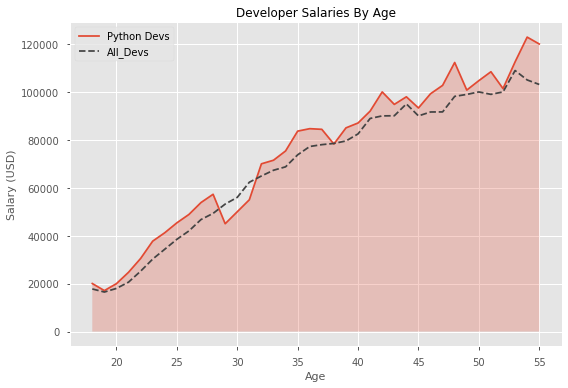

In [11]:
plt.plot(ages, python_salaries, label='Python Devs')
plt.plot(ages, all_salaries, linestyle='--', color='#444444', label='All_Devs')

#RELLENOS
plt.fill_between(ages, python_salaries, alpha=0.25)

plt.legend()
plt.title('Developer Salaries By Age')
plt.xlabel('Age')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show

Si quiero que no rellene desde el cero, puedo pasar otro argumento que *represente el corte con el eje y constante*

<function matplotlib.pyplot.show(close=None, block=None)>

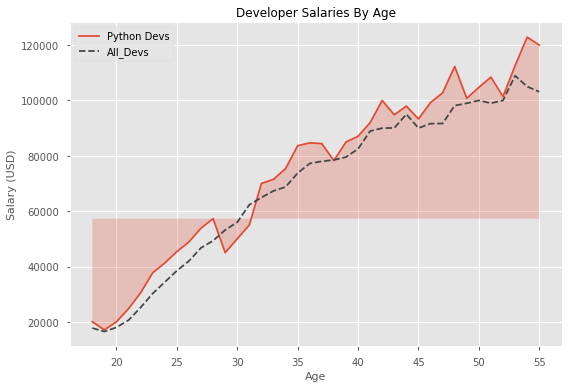

In [12]:
# se pasa como tercer parametro para rellenar entre los salarios de python y el salario medio
overal_median = 57287

plt.plot(ages, python_salaries, label='Python Devs')
plt.plot(ages, all_salaries, linestyle='--', color='#444444', label='All_Devs')

#RELLENOS
plt.fill_between(ages, python_salaries, overal_median, alpha=0.25)

plt.legend()
plt.title('Developer Salaries By Age')
plt.xlabel('Age')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show

# Usando Condicionales
Se pueden agregar condiciones para que Python solo dibuje el relleno cuando esa condicion sea verdadera.
- Estas condiciones se pasan en el argumento `where`
- Se pasa un argumento adicional `interpolate=True` con el fin de que las *intersecciones en x* no se corten y para que todo se rellene correctamente.

> En caso de querer colorear otra area de diferente color, se debe escribir otro `fill_between`

<function matplotlib.pyplot.show(close=None, block=None)>

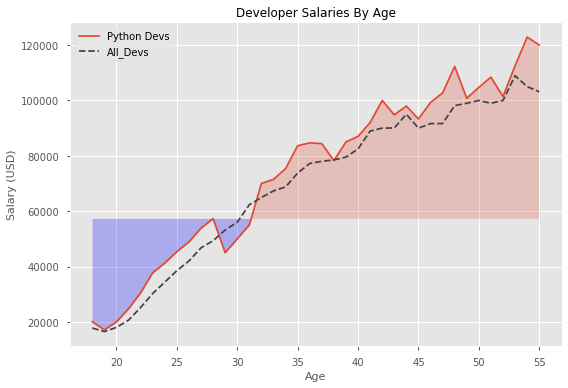

In [20]:
# se pasa como tercer parametro para rellenar entre los salarios de python y el salario medio
overal_median = 57287

plt.plot(ages, python_salaries, label='Python Devs')
plt.plot(ages, all_salaries, linestyle='--', color='#444444', label='All_Devs')

#RELLENOS
plt.fill_between(ages, python_salaries, overal_median, where=(python_salaries > overal_median), 
                 interpolate=True, alpha=0.25)

plt.fill_between(ages, python_salaries, overal_median, where=(python_salaries <= overal_median), 
                 interpolate=True, alpha=0.25, color='blue')

plt.legend()
plt.title('Developer Salaries By Age')
plt.xlabel('Age')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show

# Colorear el área entre dos plots
Se puede pasar como tercer argumento (el cual define el valor del `eje y` hasta el cual se colorea) los valores de datos de un plot que será usado como límite para rellenar

> Se puede pasar un label a plt.fill_between con el fin de ubicarlo en la leyenda

<function matplotlib.pyplot.show(close=None, block=None)>

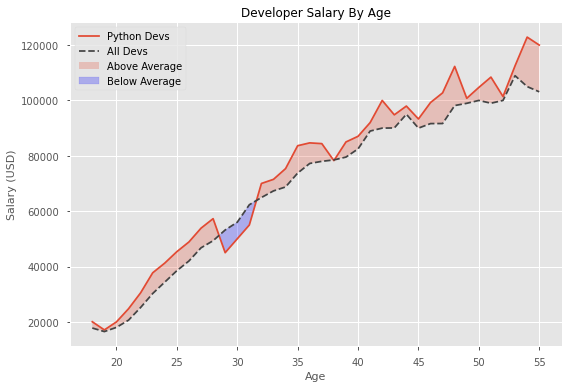

In [26]:
'''En este ejemplo se va a colorear el área entre el plot de los desarrolladores de Python y 
el plot de los salarios medios de todos los desarrolladores '''
# plots
plt.plot(ages, python_salaries, label='Python Devs')
plt.plot(ages, all_salaries, color='#444444', linestyle='--', label='All Devs')

# rellenos
plt.fill_between(ages, python_salaries, all_salaries, where=(python_salaries > all_salaries),
                interpolate=True, alpha=0.25, label='Above Average')
plt.fill_between(ages, python_salaries, all_salaries, where=(python_salaries <= all_salaries),
                interpolate=True, color='blue', alpha=0.25, label='Below Average')

plt.title('Developer Salary By Age')
plt.xlabel('Age')
plt.ylabel('Salary (USD)')
plt.legend()

plt.tight_layout()
plt.show

# EJEMPLO PRÁCTICO
El objetivo es calcular con facilidad los valores de los esfuerzos cortantes V(x) y los momentos flectores M(x) en cualquier punto de la viga, y su representación en función de la distancia x  a uno de los extremos. Como ejemplo analizamos una viga AB de longitud L (figura a), simplemente apoyada y bajo la acción de una sola carga P concentrada en el punto medio.

<img src='viga.png'>

$$ V(x) = \frac{P}{2} $$

$$ M_1(x) = \frac{P}{2} * x  $$

$$ M_2(x) = \frac{P}{2} * (L - x)  $$

https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd
https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/

In [32]:
import numpy as np

In [120]:
L = 4 #metros
P = 100 #kN

# para mejorar performance tambien se pueden plotear dos puntos
valores_x = np.linspace(0, 4, 401)
cortante_y = np.full(shape=401, fill_value=P/2)

<function matplotlib.pyplot.show(close=None, block=None)>

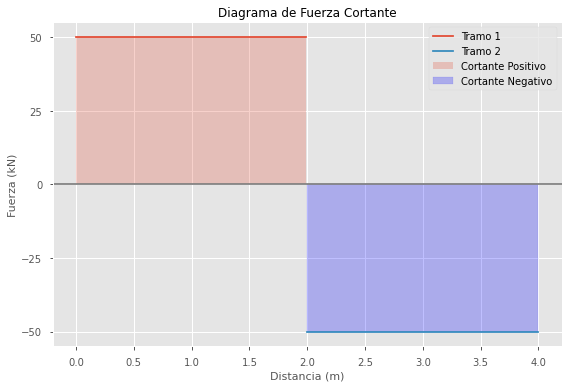

In [95]:

plt.plot(valores_x[valores_x < L/2], cortante_y[valores_x < L/2], label='Tramo 1')
plt.plot(valores_x[valores_x >= L/2], -cortante_y[valores_x >= L/2], label='Tramo 2')

plt.fill_between(valores_x, cortante_y, where=(valores_x < L/2),
                interpolate=True, alpha=0.25, label='Cortante Positivo')

plt.fill_between(valores_x, -cortante_y, where=(valores_x >= L/2), color='blue',
                interpolate=True, alpha=0.25, label='Cortante Negativo')

plt.title("Diagrama de Fuerza Cortante")
plt.xlabel('Distancia (m)')
plt.ylabel('Fuerza (kN)')
plt.yticks(np.arange(-50, 51, 25))

plt.axhline(y=0, color='gray')
plt.tight_layout()
plt.legend()

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

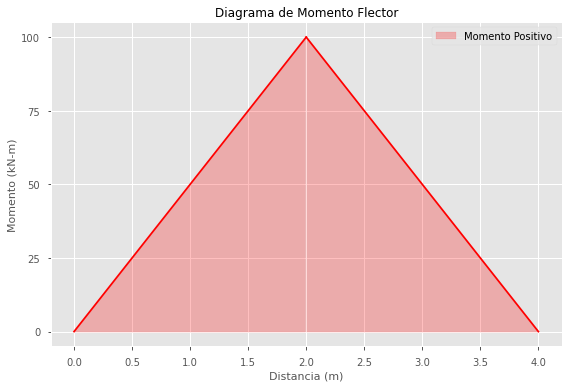

In [121]:
def M1(x):
    return P * x / 2

def M2(x):
    return (P / 2) * (L - x)
    
plt.plot(valores_x[valores_x <= L /2], M1(valores_x[valores_x <= L /2]), color='red')
plt.plot(valores_x[valores_x >= L / 2], M2(valores_x[valores_x >= L /2]), color='red')

plt.fill_between(valores_x, M1(valores_x), where=(valores_x < L/2), 
                 interpolate=True, color='red', alpha=0.25, label='Momento Positivo')
plt.fill_between(valores_x[valores_x >= L /2], M2(valores_x[valores_x >= L /2]), 
                 interpolate=True, color='red', alpha=0.25)
plt.legend()
plt.title('Diagrama de Momento Flector')
plt.xlabel('Distancia (m)')
plt.ylabel('Momento (kN-m)')
plt.yticks(np.arange(0, 101, 25))
plt.tight_layout()
plt.show

# Obtener un array para todo el gráfico
Usando `np.piecewise` puedo obtener un array de valores con base en funciones definidas por tramos.
> Recibe como primer argumento los valores en el `eje x`. Como segundo parámetro una lista de condiciones y su tercer parámetro es una lista de funciones. Para más información [leer la documentación](https://numpy.org/doc/stable/reference/generated/numpy.piecewise.html)



In [141]:
array = np.arange(-6, 6)
np.piecewise(array, [array < 0, array >= 0], [-1, 1])

array([-1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1])

In [144]:
np.piecewise(array, [array < 0, array >= 0], [lambda x: x * 2, lambda x: x ** 2])

array([-12, -10,  -8,  -6,  -4,  -2,   0,   1,   4,   9,  16,  25])

In [145]:
np.piecewise(array, [array < 0, array >= 0], [lambda x: -x + 1, lambda x: x])

array([7, 6, 5, 4, 3, 2, 0, 1, 2, 3, 4, 5])

In [124]:
# numpy.piecewise(x, condlist, funclist, *args, **kw)
cortante = np.piecewise(valores_x, [valores_x < L / 2, valores_x >= L/2], [lambda x: P / 2, lambda x: -P / 2])

<function matplotlib.pyplot.show(close=None, block=None)>

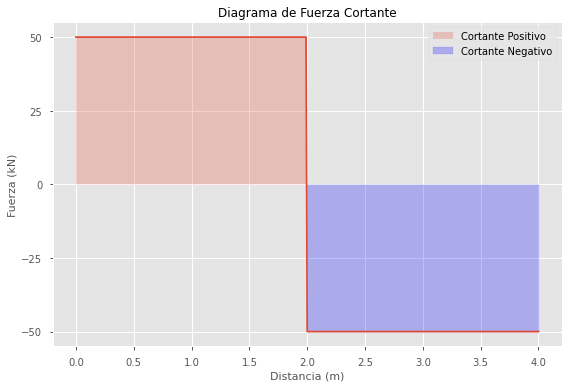

In [133]:
plt.plot(valores_x, cortante)

plt.fill_between(valores_x, cortante, where=(cortante > 0), 
                 interpolate=True, alpha=0.25, label='Cortante Positivo')

plt.fill_between(valores_x, cortante, where=(cortante < 0), color='blue',
                 interpolate=True, alpha=0.25, label='Cortante Negativo')
#plt.fill_between(valores_x, cortante, cortante < 0, alpha=0.25, color='blue', label='Cortante Negativo')


plt.title("Diagrama de Fuerza Cortante")
plt.xlabel('Distancia (m)')
plt.ylabel('Fuerza (kN)')
plt.yticks(np.arange(-50, 51, 25))

plt.tight_layout()
plt.legend()
plt.show

In [138]:
momento = np.piecewise(valores_x, [valores_x < L / 2, valores_x >= L / 2], [lambda x: M1(x), lambda x: M2(x)])
momento

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

<function matplotlib.pyplot.show(close=None, block=None)>

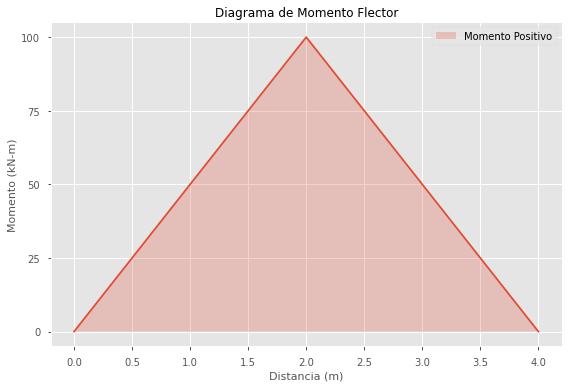

In [140]:
plt.plot(valores_x, momento)

plt.fill_between(valores_x, momento, where=(momento > 0), interpolate=True, alpha=0.25, label='Momento Positivo')

plt.legend()
plt.title('Diagrama de Momento Flector')
plt.xlabel('Distancia (m)')
plt.ylabel('Momento (kN-m)')
plt.yticks(np.arange(0, 101, 25))
plt.tight_layout()

plt.show